### Supervised Learning Exercise: Iris Dataset


Let's get started.

In [4]:
#Importations
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris


#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

## Step 1: Data

In [5]:
#Load the dataset and save it as a variable called data



####### Please enter your code here. 

data= load_iris()




In [6]:
#For easy visualization, let's put the data in a dataframe
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['target'] = data.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [7]:
#Look for missing values per column
df.isnull().sum(axis = 0)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
#Visualize the data to look for corelations

# Compute the correlation matrix
corr = df.corr()

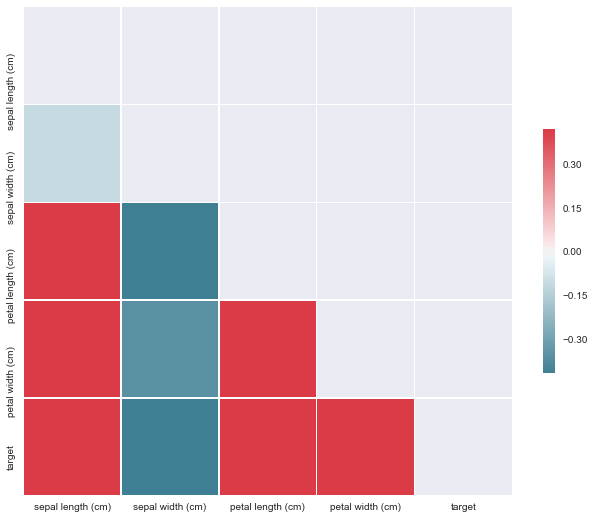

In [9]:
#Visualize the correlation using seaborn: Please refer to https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Step 2: Split the dataset into two


Specify how big you'd like the training set and test set to be. Example:

<img src="images/train_test_split.png" height="70%" width="70%" align="left">


In [10]:
X = pd.DataFrame(data.data)

y = pd.Series(data.target)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


## Step 3: Use the Training set to Train the model

You do this in two steps:
    * First, selecting the type of model you'd like to use. For now, we'll treat logistic regression as a black box and come back to it at a later time.
    * Secondly, we run the .fit method

In [11]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 4: Use the Test set to test how good the model is

In this process of evaluation, we will use two metrics to test the model:
    * Accuracy
        This looks at the number of times the model made correct predictions, divided by the total 
        
    * Confusion Matrix
        The confusion matrix looks a little more closely at the type of error the model made. 
        
        False Negative:
            - A person  had cancer, but the model predicted they were fine (no cancer)
            - This is also called a Type II error
        False Positive:
            - A person  did not have cancer, but the model predicted they were sick and had cancer
            - This is also called a Type I error
          
      

In [12]:
Y_pred = classifier.predict(X_test)
#Print accuracy
accuracy = accuracy_score(Y_pred,Y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))


Accuracy : 88.889%


In [13]:
confusion_matrix(Y_pred,Y_test)

array([[16,  0,  0],
       [ 0, 13,  0],
       [ 0,  5, 11]])